## Code to Access Data in most recent AkWarm Energy Library

In [6]:
from importlib import reload
from io import BytesIO
import gzip
import xml.etree.ElementTree as ET
import requests

In [7]:
def get_akwarm_lib_xml():
    """Returns the root XML ElementTree of the most current AkWarm Energy Library.
    Prints the name of that library.
    """
    resp = requests.get('https://analysisnorth.com/AkWarm/update_combined/Library_Info.txt')
    cur_lib_name = resp.text.splitlines()[-1].split('\t')[0]
    resp = requests.get(f'https://analysisnorth.com/AkWarm/update_combined/{cur_lib_name}')
    res = [ x ^ 30 for x in resp.content]
    file_res = BytesIO(bytes(res))
    del res   # to save memory
    lib = gzip.GzipFile(mode='r', fileobj=file_res).read()
    root = ET.fromstring(lib.decode('utf-8'))
    return root, cur_lib_name

In [8]:
def write_city_list():
    """Writes into a file the list of Cities from the most current AkWarm Energy Library.
    File name is 'city-list.txt' and is placed in the current directory.  One city per line,
    sorted alphabetically.
    """
    root, _ = get_akwarm_lib_xml()
    cities = root.find("./item/key/string[.='City']/../../value/ArrayOfCity")
    city_list = []
    for city in cities:
        city_name = city.find("Name").text
        if city.find('Active').text == 'true':
            city_list.append(city_name)
        else:
            print('Inactive:', city_name)

    city_list.sort()
    with open('city-list.txt', 'w') as fout:
        for city in city_list:
            print(city, file=fout)

In [9]:
def get_akwarm_city_data():
    """Returns a dictionary keyed on City Name with the dictionary value being a dictionary
    of key fields and values from the City table in the most recent AkWarm Energy Library.
    Makes an attempt to convert the field value to a float.
    """
    root, lib_name = get_akwarm_lib_xml()
    city_data = {}
    targets = ('Oil1Price', 'Oil2Price')
    cities = root.find("./item/key/string[.='City']/../../value/ArrayOfCity")
    for city in cities:
        fields = {}    
        for fld in targets:
            val = city.find(fld).text
            try:
                val = float(city.find(fld).text)
            except:
                pass
            fields[fld] = val
        city_data[city.find("Name").text] = fields

    return city_data, cur_lib_name

In [10]:
write_city_list()

Inactive: Mertarvilk


In [11]:
city_info, lib_name = get_akwarm_city_data()
print(lib_name)
city_info

NameError: name 'cur_lib_name' is not defined

In [ ]:
import gspread
from config import spreadsheet_creds_file
gc = gspread.service_account(filename=spreadsheet_creds_file)
wb = gc.open_by_key('1FE5Lri1v_I6ZRxgfikdsU72NWKfr7eJ2OYjcbpsjaY4')

In [ ]:
vals = wb.worksheet('Customers').get_all_values()

In [ ]:
vals[3]

['city',
 'customer',
 'cust_email',
 'anthc_emails',
 'sensor_id',
 'btu_mult',
 'fuel_categ',
 'pct_fuel_billed',
 'util_akw_disc',
 'util_fuel_override',
 'akwarm_city',
 'cust_fuel_disc',
 'cust_fuel_override',
 'feas_g_01',
 'feas_g_02',
 'feas_g_03',
 'feas_g_04',
 'feas_g_05',
 'feas_g_06',
 'feas_g_07',
 'feas_g_08',
 'feas_g_09',
 'feas_g_10',
 'feas_g_11',
 'feas_g_12']

In [ ]:
import data_util
reload(data_util)

<module 'data_util' from '/home/tabb99/heat-recovery-billing/data_util.py'>

In [ ]:
data_util.get_akwarm_city_data()

({'Anchorage': {'Oil1Price': 3.36, 'Oil2Price': None},
  'Adak': {'Oil1Price': 4.73, 'Oil2Price': 4.73},
  'Akutan': {'Oil1Price': None, 'Oil2Price': 2.55},
  'Allakaket': {'Oil1Price': 7.0, 'Oil2Price': 7.0},
  'Angoon': {'Oil1Price': 4.15, 'Oil2Price': None},
  'Aniak': {'Oil1Price': 6.05, 'Oil2Price': None},
  'Arctic Village': {'Oil1Price': 12.0, 'Oil2Price': None},
  'Atka': {'Oil1Price': 7.5, 'Oil2Price': None},
  'Auke Bay': {'Oil1Price': 3.1, 'Oil2Price': 3.12},
  'Barrow/Utqiavik': {'Oil1Price': None, 'Oil2Price': None},
  'Bethel': {'Oil1Price': 3.73, 'Oil2Price': None},
  'Bettles': {'Oil1Price': 7.45, 'Oil2Price': None},
  'Delta Junction': {'Oil1Price': 2.93, 'Oil2Price': None},
  'Big Lake': {'Oil1Price': 2.09, 'Oil2Price': None},
  'Cantwell': {'Oil1Price': 3.46, 'Oil2Price': None},
  'Central': {'Oil1Price': 3.6, 'Oil2Price': None},
  'Chalkyitsik': {'Oil1Price': 8.0, 'Oil2Price': None},
  'Chickaloon': {'Oil1Price': 2.8, 'Oil2Price': None},
  'Chicken': {'Oil1Price': 3

In [ ]:
data_util.utility_fuel_prices()

{'AVEC Northwest': 3.75, 'AVEC YK': 3.25, 'AVEC Interior': 4.2, 'Other': nan}

In [ ]:
data_util.customer_records()

[{'city': 'Chevak',
  'customer': 'Water Plant',
  'cust_email': 'xyz@chevak.us',
  'anthc_emails': 'cocox@anthc.org, gdhodgson@anthc.org, dmmadden1@anthc.org',
  'sensor_id': 'A81758FFFE0565CE_pulseAbs_raw',
  'btu_mult': 1.0,
  'fuel_categ': 'AVEC YK',
  'pct_fuel_billed': 0.3,
  'util_akw_disc': nan,
  'util_fuel_override': nan,
  'akwarm_city': 'Chevak',
  'cust_fuel_disc': 0.0,
  'cust_fuel_override': nan,
  'feas_g_01': 200.0,
  'feas_g_02': 180.0,
  'feas_g_03': 150.0,
  'feas_g_04': 100.0,
  'feas_g_05': 50.0,
  'feas_g_06': 20.0,
  'feas_g_07': 0.0,
  'feas_g_08': 10.0,
  'feas_g_09': 50.0,
  'feas_g_10': 80.0,
  'feas_g_11': 120.0,
  'feas_g_12': 180.0}]

In [ ]:
data_util.customer_records()[0].keys()

dict_keys(['city', 'customer', 'cust_email', 'anthc_emails', 'sensor_id', 'btu_mult', 'fuel_categ', 'pct_fuel_billed', 'util_akw_disc', 'util_fuel_override', 'akwarm_city', 'cust_fuel_disc', 'cust_fuel_override', 'feas_g_01', 'feas_g_02', 'feas_g_03', 'feas_g_04', 'feas_g_05', 'feas_g_06', 'feas_g_07', 'feas_g_08', 'feas_g_09', 'feas_g_10', 'feas_g_11', 'feas_g_12'])

In [ ]:
from dateutil.parser import parse
parse('Oct 2021').strftime('%Y-%m-%d')

'2021-10-05'

## Examine Test Data

In [ ]:
import pandas as pd

<AxesSubplot:>

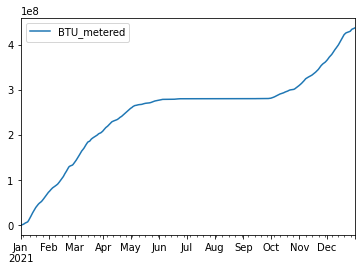

In [ ]:
df = pd.read_pickle('test-data/clean_dataset.pkl', compression='bz2')
df.plot()

<AxesSubplot:>

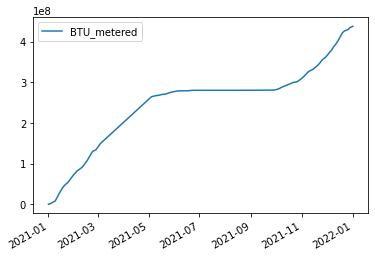

In [ ]:
df = pd.read_pickle('test-data/two_missing_months.pkl', compression='bz2')
df.plot()

In [ ]:
df.describe()

,BTU_metered
count,7.318000e+03
mean,2.566181e+08
std,1.038054e+08
min,4.250000e+04
25%,2.702461e+08
50%,2.802620e+08
75%,2.954361e+08
max,4.377018e+08


In [ ]:
from datetime import datetime
datetime.now().month

1

## Test functions

In [1]:
from imp import reload
import numpy as np
import pandas as pd
import util.heat_calcs as hc

In [49]:
reload(hc)
btus, st, en = hc.gallons_delivered(3, 2021, 'test-two_missing_months')
(en - st).total_seconds(), (en - st).seconds

(298800.0, 39600)

In [ ]:
reload(hc)
for mo in range(1, 13):
    btu_list = []
    for sensor in ('test-clean_dataset', 'test-sensor_resets', 'test-missing_values', 'test-two_missing_months'):
        btus, st, end = hc.gallons_delivered(mo, 2021, sensor)
        btu_list.append(btus)
    print(mo, *btu_list)


1 74084750.0 74084750.0 74007500.0 74084750.0
2 65408750.0 65408750.0 65370500.0 65408750.0
3 69935000.0 69877750.0 70050500.0 10107250.0
4 49656000.0 49656000.0 49656000.0 nan
5 18022500.0 18022500.0 18003000.0 14185000.0
6 3112500.0 3112250.0 3132000.0 3112500.0
7 0.0 0.0 0.0 0.0
8 18750.0 18750.0 18750.0 18750.0
9 1296500.0 1296500.0 1248500.0 1296500.0
10 28539250.0 28539250.0 28449750.0 28539250.0
11 55284500.0 55284500.0 55422000.0 55284500.0
12 72300750.0 72300750.0 72300750.0 72300750.0


<Figure size 432x288 with 0 Axes>

<Figure size 158.4x108 with 0 Axes>

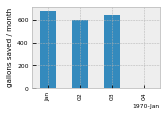

In [9]:
from matplotlib import pyplot as plt
import PIL
reload(hc)
btus, st, end, mo_image, hist_image, df = hc.gallons_delivered(3, 2021, 'test-clean_dataset')

In [11]:
df.describe()

,btus,change,gallons,month,year
count,2.161000e+03,2160.000000,2160.000000,2161.000000,2161.0
mean,1.069551e+08,97006.944444,0.891608,2.000925,2021.0
std,6.473023e+07,41362.041802,0.380166,0.831108,0.0
min,4.250000e+04,17250.000000,0.158548,1.000000,2021.0
25%,5.218700e+07,60000.000000,0.551471,1.000000,2021.0
50%,1.029258e+08,102250.000000,0.939798,2.000000,2021.0
75%,1.668142e+08,127500.000000,1.171875,3.000000,2021.0
max,2.095775e+08,186500.000000,1.714154,4.000000,2021.0


In [26]:
from pandas.tseries.frequencies import to_offset
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

dfh = df.resample('M').sum()
dfh.index = dfh.index + to_offset('-15D')
dfh

,btus,change,gallons,month,year
2021-01-16,2.520322e+10,74084750.0,680.926011,744,1503624
2021-02-13,7.116827e+10,65408750.0,601.183364,1344,1358112
2021-03-16,1.345489e+11,69935000.0,642.784926,2232,1503624
2021-04-15,2.095775e+08,106500.0,0.978860,4,2021


In [50]:
for d, row in dfh.iterrows():
    print(d.to_pydatetime())

2021-01-16 00:00:00
2021-02-13 00:00:00
2021-03-16 00:00:00
2021-04-15 00:00:00


In [39]:

xlabels = [f"{d.strftime('%b')} '{d.strftime('%y')}" for d in dfh.index]

["Jan '21", "Feb '21", "Mar '21", "Apr '21"]

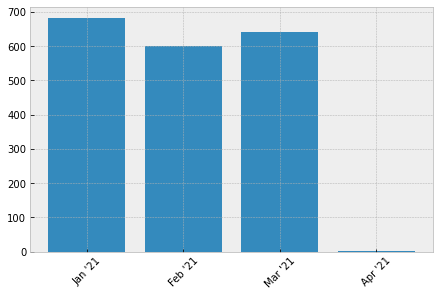

In [43]:
plt.rcParams['font.size'] = 10
xlabels = [f"{d.strftime('%b')} '{d.strftime('%y')}" for d in dfh.index]
plt.bar(xlabels, dfh.gallons)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=45)  #, horizontalalignment='right')
#ax = plt.gca()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

In [30]:
dfh['gallons']

2021-01-16    680.926011
2021-02-13    601.183364
2021-03-16    642.784926
2021-04-15      0.978860
Name: gallons, dtype: float64

In [16]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-01-31 to 2021-04-30
Freq: M
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   btus     4 non-null      float64
 1   change   4 non-null      float64
 2   gallons  4 non-null      float64
 3   month    4 non-null      int64  
 4   year     4 non-null      int64  
dtypes: float64(3), int64(2)
memory usage: 192.0 bytes


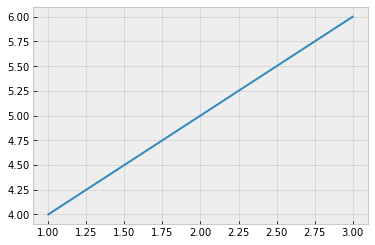

In [7]:
import io
plt.plot([1,2,3], [4,5,6])
buf = io.BytesIO()
plt.savefig(buf)
buf.seek(0)
img = PIL.Image.open(buf)

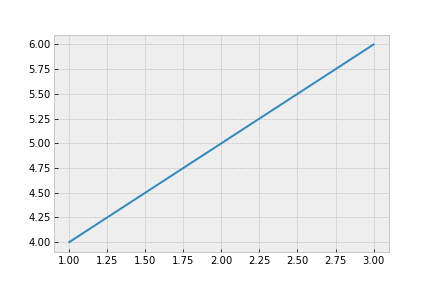

In [8]:
img